In [1]:
# project: p6
# submitter: spprahl
# partner: none
# hours: 8

In [2]:
#Imports# 
import geopandas as gpd
import shapely.geometry
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql
import math

#Land Plotting Imports
import rasterio
from rasterio.mask import mask

#ML Imports
import sklearn
import sklearn.compose
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.impute
import sklearn.linear_model
import sklearn.metrics

In [3]:
counties_GDF = gpd.read_file("counties.geojson") #population and boundaries of each county in Wisconsin
counties_tracts_GDF = gpd.read_file("tracts.shp") #boundaries of each census tract (counties are subdivided into tracts)


# counties_tracts.db - details about housing units per tract # in part2
# land.zip - details about land use (farm, forest, developed, etc.) #in part 3

In [4]:
#Q1
num_counties = len(counties_GDF['NAME'].drop_duplicates(keep='first')) #ensure no duplicates 
num_counties

72

<AxesSubplot:>

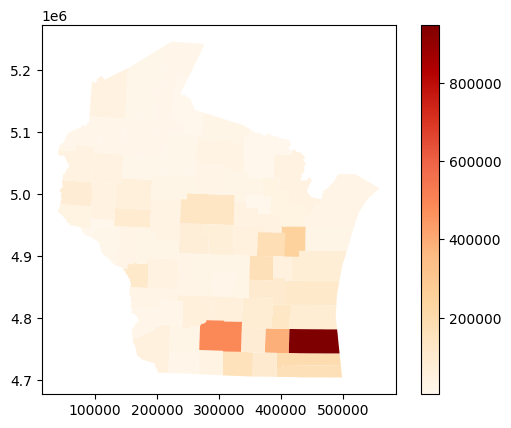

In [5]:
#Q2
#Create a geopandas plot that has a legend using the population from the POP100 column
counties_GDF = counties_GDF.to_crs("epsg:32616")
#no need for subplots
counties_GDF.plot(column='POP100', cmap='OrRd', legend=True) #viridis


In [6]:
## Feature 1 - AREALAND ##
# From Piazza
conn = sql.connect("counties_tracts.db")
df2 = pd.read_sql("""SELECT * FROM counties""", conn)

counties_GDF = pd.merge(counties_GDF, df2, on = "NAME", how = "left")
counties_GDF.head()

,NAME,POP100,geometry,index,COUNTY,AREALAND,AREAWATER
0,Racine County,195408,"POLYGON ((412260.610 4724698.510, 412404.423 4...",0,101,861533739,1190103013
1,Clark County,34690,"POLYGON ((216707.903 4924930.543, 218680.065 4...",1,019,3133378070,23239614
2,Wood County,74749,"POLYGON ((282793.227 4912927.325, 282801.063 4...",2,141,2054044751,41994799
3,Rusk County,14755,"POLYGON ((192687.724 5032591.151, 192689.211 5...",3,107,2366092584,44813690
4,Ozaukee County,86395,"POLYGON ((427465.430 4782525.082, 427468.520 4...",4,089,603514413,2287415379


In [7]:
# Train-test split
train, test = sklearn.model_selection.train_test_split(counties_GDF, test_size=0.25, random_state=250)



In [8]:
#Q3
list(test['NAME'])

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [9]:
#Q4
# Train-test split
train, test = sklearn.model_selection.train_test_split(counties_GDF, test_size=0.25, random_state=250)

#Make Model
model = sklearn.linear_model.LinearRegression()
model.fit(train[['AREALAND']], train['POP100'])
model.score(test[['AREALAND']], test['POP100'])

0.016720430179409274

In [10]:
print(400*2590000)
test
3100993706
1036000000

1036000000


1036000000

In [11]:
#Q5
#2.59 square kilometers per square mile
#From Piazza - you could use "400 * 2590000" units as the feature value.
model.predict([[400*2590000]])[0]


/home/sean/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90000.07422783462

In [12]:
### Part 2 ###

In [13]:
## Feature 2 - HU100 ##
#From Piazza
df2 = pd.read_sql("""SELECT SUM(tracts.HU100) as HU100, counties.NAME FROM tracts LEFT JOIN counties ON tracts.COUNTY = counties.COUNTY GROUP BY counties.NAME""", conn)
df2
counties_GDF = pd.merge(counties_GDF, df2, on = "NAME", how = "left")
counties_GDF.head()

,NAME,POP100,geometry,index,COUNTY,AREALAND,AREAWATER,HU100
0,Racine County,195408,"POLYGON ((412260.610 4724698.510, 412404.423 4...",0,101,861533739,1190103013,82164
1,Clark County,34690,"POLYGON ((216707.903 4924930.543, 218680.065 4...",1,019,3133378070,23239614,15076
2,Wood County,74749,"POLYGON ((282793.227 4912927.325, 282801.063 4...",2,141,2054044751,41994799,34088
3,Rusk County,14755,"POLYGON ((192687.724 5032591.151, 192689.211 5...",3,107,2366092584,44813690,8883
4,Ozaukee County,86395,"POLYGON ((427465.430 4782525.082, 427468.520 4...",4,089,603514413,2287415379,36267


In [14]:
# Train-test split
train, test = sklearn.model_selection.train_test_split(counties_GDF, test_size=0.25, random_state=250)


In [15]:
#Q6
list(test['NAME'])

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [16]:
#Q7
#From ChatGPT - How to turn a 2 column df into a dictionary

test.set_index('NAME')['HU100'].to_dict()
#Set Index changes index of DF to name column
#Slice to select only HU100 column
#Series.to_dict

{'Dane County': 216022,
 'Juneau County': 14669,
 'Taylor County': 10582,
 'Vilas County': 25116,
 'Rusk County': 8883,
 'Price County': 11120,
 'Jackson County': 9727,
 'Waushara County': 14843,
 'Pepin County': 3579,
 'Douglas County': 22825,
 'Ashland County': 9656,
 'Milwaukee County': 418053,
 'Waupaca County': 25396,
 'Richland County': 8868,
 'Lafayette County': 7230,
 'Washburn County': 12979,
 'Dunn County': 17964,
 'Bayfield County': 12999}

In [17]:
#Q8
#Make Model
model = sklearn.linear_model.LinearRegression()
trained_model = model.fit(train[['HU100']], train['POP100'])
# Adapted from p5 directions and project
scores = sklearn.model_selection.cross_val_score(trained_model, X = train[['HU100']], y = train['POP100']) #outputs array w/ 5 scores #Why predicting the training set?
# print(f"AVG: {scores.mean()}, STD: {scores.std()}\n")

scores.mean()

0.9739348181232653

In [18]:
# ChatGPT - how to calculate standard deviation without using .std()?
def calculate_std(data):
    # Step 1: Calculate the mean
    mean = np.mean(data)
    # Step 2: Calculate the squared differences
    squared_diff = (data - mean) ** 2
    # Step 3: Calculate the mean of squared differences
    mean_squared_diff = np.mean(squared_diff)
    # Step 4: Take the square root
    std_dev = np.sqrt(mean_squared_diff)
    return std_dev

In [19]:
#Q9
calculate_std(scores)

0.01693954236334351

In [20]:
#Q10
#ChatGPT - how to get coefficient and intercept of trained linear regression model with SKlearn? : for coef and intercept
coefficient = np.round(trained_model.coef_[0], 2)
intercept = np.round(trained_model.intercept_, 2)

str('POP100 = '+str(coefficient)+'*HU100 + '+str(intercept))

'POP100 = 2.47*HU100 + -9276.89'

Text(64    104371
Name: HU100, dtype: int64, 64    248007
Name: POP100, dtype: int64, 'Brown County  ')

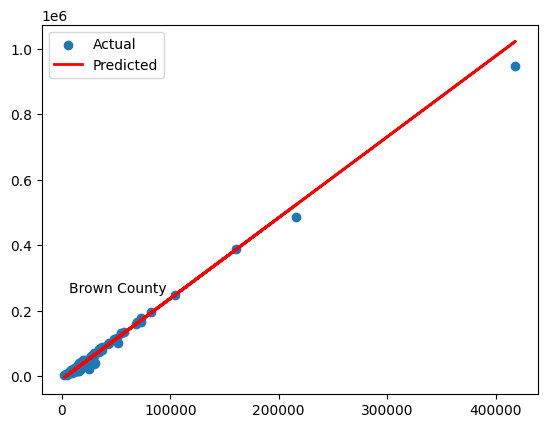

In [21]:
#Q11
#Adapted from Lecture notes : L34E1
y_pred = trained_model.predict(counties_GDF[['HU100']])
plt.scatter(counties_GDF[['HU100']], counties_GDF['POP100'])
plt.plot(counties_GDF[['HU100']], y_pred, linewidth = 2, color = "red")
plt.legend(['Actual', 'Predicted'])
# Annotate Brown County => Adapted from ChatGPT - how to use a .text call to annotate with matplotlib? and https://matplotlib.org/stable/api/text_api.html .text Documentation
brown_county = counties_GDF[counties_GDF['NAME'] == 'Brown County']
plt.text(brown_county['HU100'], brown_county['POP100'], 'Brown County  ', fontsize=10, ha='right', va = 'bottom')

In [22]:
### Part 3 ###

In [23]:
#Q12
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])

((A>=3) & (A<=6)).astype(int).sum()


8

In [24]:
#Get land info from zip folder
land = rasterio.open("zip://../p6/land.zip!wi.tif")

#Need brown county outline and land info
brown_county = counties_GDF[counties_GDF['NAME'] == 'Brown County']
matrix, _ = mask(land, brown_county.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]

In [25]:
#Custom Color Mapping
from matplotlib.colors import ListedColormap

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

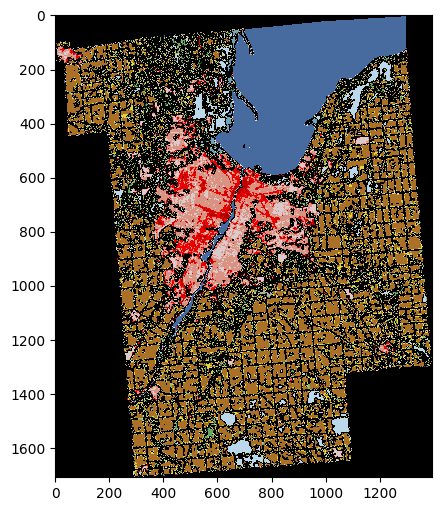

In [26]:
#Q13
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(matrix, vmin=0, vmax=255, cmap=custom_cmap)

In [27]:
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}

In [28]:
#Q14
brown = (matrix != 0).astype(int).sum()
open_water = (matrix == 11).astype(int).sum()
proportion = open_water/brown
proportion

0.13797526789725206

In [29]:
#Debugging
Racine_county = counties_GDF[counties_GDF['NAME'] == 'Racine County']
matrix, _ = mask(land, Racine_county.to_crs(land.crs)["geometry"], crop=True)
matrix = matrix[0]

moss_matrix_sum = (matrix == 41).astype(int).sum()

moss_matrix_sum

86254

In [30]:
#Relationship between POP100 and 'deciduous: 41'
#For loop and complete Q13/14 for each individaul county
#.loc for df from gdf

# matrix, _ = mask(land, counties_GDF.to_crs(land.crs)["geometry"], crop=True)
# matrix = matrix[0]
pop_and_decid = dict()

for county in range(len(counties_GDF)):
    curr_county = counties_GDF[counties_GDF['NAME'] == counties_GDF.iloc[county]['NAME']]
    matrix, _ = mask(land, curr_county.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]

    decid_matrix_sum = (matrix == 41).astype(int).sum()

    pop_and_decid[curr_county['POP100'][county]] = decid_matrix_sum


Text(0.5, 1.0, 'Deciduous Forest vs Population')

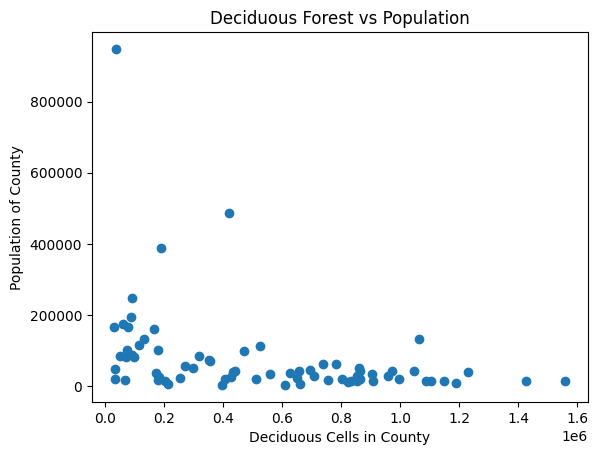

In [31]:
#Q15

decid = pop_and_decid.values()
pops = pop_and_decid.keys()
plt.scatter(decid, pops)

plt.xlabel('Deciduous Cells in County')
plt.ylabel('Population of County')
plt.title('Deciduous Forest vs Population')

In [32]:
### Individual Part ###

In [33]:
for i in counties_tracts_GDF.index:
    curr_county = counties_tracts_GDF[counties_tracts_GDF['GEOID'] == counties_tracts_GDF.iloc[i]['GEOID']] #keeps as geodataframe
    matrix, _ = mask(land, curr_county.to_crs(land.crs)["geometry"], crop=True)
    matrix = matrix[0]

    for j in land_use.keys():
        curr_sum = (matrix == land_use[j]).astype(int).sum()
        counties_tracts_GDF.loc[i,j] = curr_sum
        


In [34]:
counties_tracts_GDF.head()

,GEOID,POP100,geometry,open_water,ice_snow,developed_open,developed_low,developed_med,developed_high,barren,...,dwarf_scrub,shrub_scrub,grassland,sedge,lichens,moss,pasture,crops,woody_wetlands,herbacious_wetlands
0,55001950204,1646,"POLYGON ((-90.02638 44.08721, -90.02627 44.089...",55465.0,0.0,12351.0,5402.0,833.0,104.0,175.0,...,0.0,18518.0,33652.0,0.0,0.0,0.0,3136.0,73433.0,84766.0,20975.0
1,55009940002,4698,"POLYGON ((-88.15018 44.51202, -88.15010 44.513...",57.0,0.0,1456.0,2104.0,1211.0,243.0,229.0,...,0.0,23.0,38.0,0.0,0.0,0.0,770.0,1503.0,2317.0,123.0
2,55061990000,0,"POLYGON ((-87.53727 44.33179, -87.53547 44.334...",2107187.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55009020100,5817,"POLYGON ((-87.93753 44.67821, -87.89338 44.678...",117008.0,0.0,6209.0,7738.0,1971.0,337.0,718.0,...,0.0,60.0,327.0,0.0,0.0,0.0,17419.0,112681.0,26017.0,2677.0
4,55009010100,6506,"POLYGON ((-88.06825 44.45368, -88.05841 44.461...",530.0,0.0,1141.0,2711.0,1109.0,174.0,2.0,...,0.0,0.0,52.0,0.0,0.0,0.0,23.0,2.0,79.0,47.0


In [35]:
# Train-test split
train, test = sklearn.model_selection.train_test_split(counties_tracts_GDF, test_size=0.20, random_state=300)
#Make Model
model = sklearn.linear_model.LinearRegression()
trained_model = model.fit(train.iloc[:,3:], train['POP100'])
scores = sklearn.model_selection.cross_val_score(trained_model, X = train.iloc[:,3:], y = train['POP100']) #outputs array w/ 5 scores #Why predicting the training set?



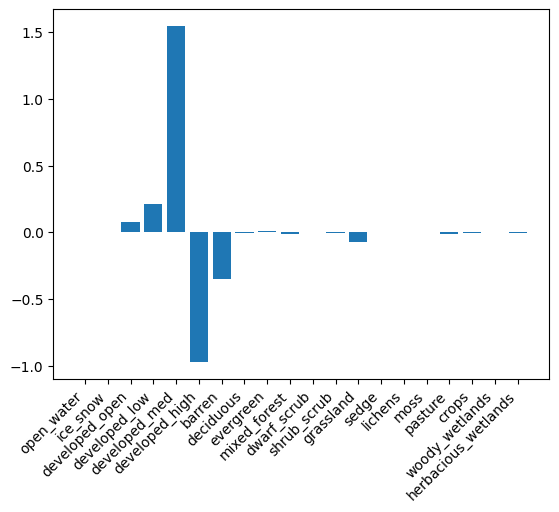

In [36]:
#Q16
#Bar plot adapted from L35E1
plt.bar(train.iloc[:,3:].keys(), trained_model.coef_)
#ChatGPT - How do I rotate x-axis labels of a bar plot
#ChatGPT - how do i eliminate this[pasted output] output? - usage of ;
plt.xticks(rotation=45, ha="right");

##Explanation
# This bar plot shows how much the model relies on each feature. A larger magnitude score (either positive or negative) means that the model relies more on that feature.
# This plot shows that the model relies most heavily on developed_high and developed_med to predict the population of the counties. 
# It also tells us that the model doesn't rely very much on variables like lichens, moss, pasture, crops, etc. 


In [37]:
# Regression Model #1
# No transformers, 2 variables
# best with just developed med and high
model_1 = sklearn.linear_model.LinearRegression()
trained_model_1 = model.fit(train[['developed_med','developed_high']], train['POP100'])
scores_1 = sklearn.model_selection.cross_val_score(trained_model_1, X = test[['developed_med','developed_high']], y = test['POP100'], scoring = 'r2')
mean_1 = scores_1.mean() 
std_1 = scores_1.std() 
print('The first model using a simple Logistic Regression with the 2 most impactful variables had mean: ' + str(mean_1) + 'and std: ' + str(std_1))

The first model using a simple Logistic Regression with the 2 most impactful variables had mean: 0.3786232827239958and std: 0.04388033964235097


In [38]:
# Regression Model #2
# Use pipeline, transformers, and more columns - transformers have no effeect, more columns makes worse

X_train = train[['developed_open', 'developed_low','developed_med','developed_high','barren','grassland']]
y_train = train['POP100']

X_test = test[['developed_open', 'developed_low','developed_med','developed_high','barren','grassland']]
y_test = test['POP100']

### Create a pipeline ###
numeric_features = ['developed_open', 'developed_low','developed_med','developed_high','barren','grassland']


# For simplicity, we use a basic pipeline with imputation and scaling 
numeric_transformer = sklearn.pipeline.Pipeline(steps=[
    ('imputer', sklearn.impute.SimpleImputer(strategy='mean')), #most freq or mean? - Mean
    ('scaler', sklearn.preprocessing.StandardScaler())
])

preprocessor = sklearn.compose.ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

classifier = sklearn.linear_model.LinearRegression() #linear vs logistic vs others? - linear for continuous and logistic for categorical - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9747134/#:~:text=Linear%20regression%20is%20used%20for,or%20a%20mix%20of%20both.

pipeline = sklearn.pipeline.Pipeline(steps=[('preprocessor', preprocessor),
                                            ('classifier', classifier)])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# trained model
trained_model_2 = pipeline.named_steps['classifier']

#cross val
scores_2 = sklearn.model_selection.cross_val_score(trained_model_1, X = X_test, y = y_test, scoring = 'r2')
mean_2 = scores_2.mean()
std_2 = scores_2.std()
print('The second model using a pipeline and more variables had mean: ' + str(mean_2) + 'and std: ' + str(std_2))

The second model using a pipeline and more variables had mean: 0.3739337145364894and std: 0.0453110237186339


In [39]:
#Q17

print('My chosen model is Model #1, a simple Linear Regression with the 2 most impactful variables (from q16 graph). It\'s output from cross_val_score had a mean of ' + str(mean_1) + 'and a std: ' + str(std_1))

#Chosen model - Regression Model #1
trained_model_1
std_1
mean_1


#I chose to use this model (my Model #1) because it was simpler, had a slightly higher mean score, and a smaller stdev. The mean of the output from cross_val_score is the r^2 value which tells me the
# proportion of explained variance. This means the Model #1 can explain 37.9% of the variance. This was a higher score than that for my Model #2, meaning that Model #1 can explain more variance then Model #2. 
# Furthermore, the smaller standard deviation means that the cross val scores of #1 were more tightly clustered around that mean score, which tells me that the mean score is more likely to be the true explained variance.
# The final reason I chose Model #1 over #2 is because it was simpler. I used just a linear regression with the two highest impact variables. I tried a few things for my Model #2, I made a pipeline and added 
# other medium impact variables, assuming that more variables would lead to a better cross_val_score. This was not the case, as my more complicated model scored slightly worse for both mean and std.


My chosen model is Model #1, a simple Linear Regression with the 2 most impactful variables (from q16 graph). It's output from cross_val_score had a mean of 0.3786232827239958and a std: 0.04388033964235097


0.3786232827239958